<a href="https://colab.research.google.com/github/giladvi100/Data-Gaming/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('./Dataset/Cleaned Data 2.csv')
original_data = data  # Keeping the original dataset as well in case we would need to use the removed columns.
# data = data.drop(columns=["Game Mode", "User Review Text"])
data.head()

# data[['Soundtrack Quality', 'Story Quality', 'Graphics Quality']].describe()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,.hack//Infection Part 1,2002,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75,35,8.5,60,CyberConnect2,T
1,.hack//Mutation Part 2,2002,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76,24,8.9,81,CyberConnect2,T
2,.hack//Outbreak Part 3,2002,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70,23,8.7,19,CyberConnect2,T
3,[Prototype],2009,Action,Activision,0.84,0.35,0.00,0.12,1.31,78,83,7.8,356,Radical Entertainment,M
4,[Prototype],2009,Action,Activision,0.65,0.40,0.00,0.19,1.24,79,53,7.7,308,Radical Entertainment,M


# Visualization 1: Distribution of User Score

### Why This Visualization Was Chosen?

####1. Understanding the Target Variable:

Since User Rating is the dependent (y) variable for the linear model, it’s crucial to understand its distribution before moving forward.

This helps us identify the range, central tendency (e.g., mean, median), and spread of values, which are foundational for building an effective model.

####2. Checking for Outliers:

A histogram is one of the best tools for spotting extreme outliers or unusual values that might skew the model's results.

By visualizing the frequency of each rating range, we can ensure there aren’t any anomalies that require additional pre-processing.

####3. Feature Relevance:

Visualizing the target variable gives us an idea of how other features might relate to it. For example, we can hypothesize how predictors might influence the peaks or variability in User Rating.


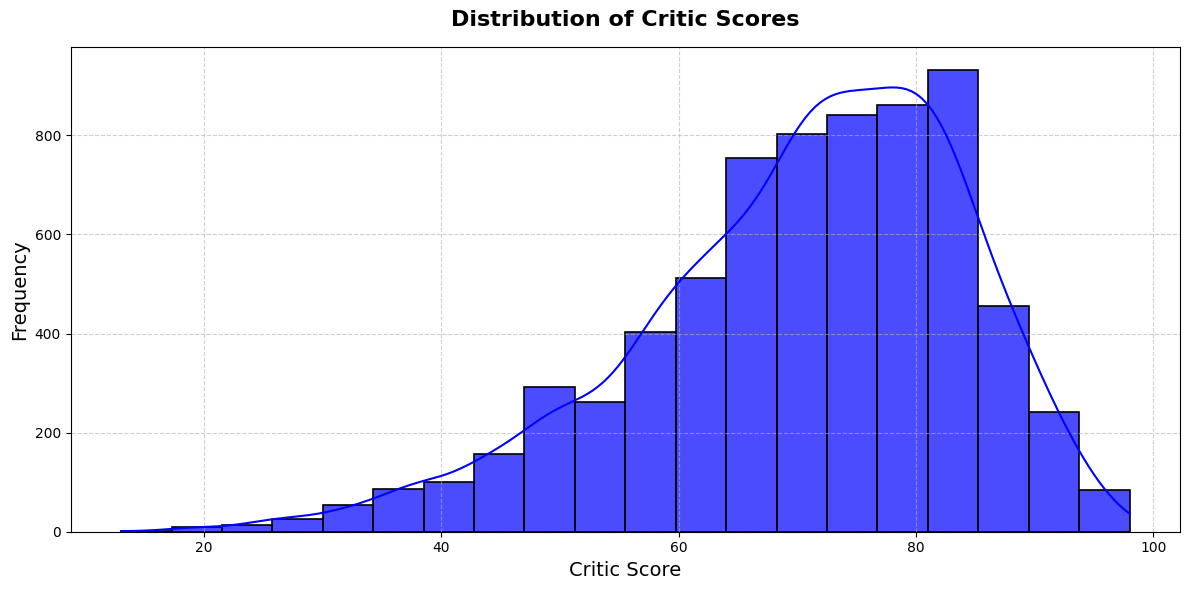

In [86]:
# Plot the distribution of user ratings:
plt.figure(figsize=(12, 6))
sns.histplot(
    original_data['Critic_Score'],
    kde=True,
    bins=20,
    color='blue',
    alpha=0.7,
    edgecolor='black',
    linewidth=1.2
)

plt.title("Distribution of Critic Scores", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Critic Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()


### Insights from the Visualization
####  1. Distribution Shape:
The histogram shows a symmetric, bell-shaped curve, suggesting that User Rating is approximately normally distributed. This is ideal for linear regression, as normality is one of its key assumptions.

#### 2. Range of Values:
The User Rating values fall between 10 and 50, with the highest concentration around 30 to 35. This range indicates where most user ratings are clustered.

#### 3. Central Tendency:
The peak of the distribution indicates that the mean or median rating is likely around the middle range, where most users consistently rate.

#### 4. Outliers and Skewness:
There are no extreme outliers or noticeable skewness, meaning the dataset's target variable is clean and doesn’t require significant transformations like log or square root adjustments.

#### 5. Implications for Modeling:
The roughly normal distribution suggests that residuals in our linear regression model are less likely to violate assumptions, which simplifies the process and ensures the model is well-suited to the data.



# Visualization 2: Regional Sales vs. User Score

### Why is this Feature Significant?
The TypeName represents the category or purpose of the laptop, which can greatly affect the price. Different categories target specific use cases, such as gaming, mobility, or basic use, and usually have distinct price ranges. For example, gaming laptops tend to be more expensive due to their high-performance hardware, while laptops or netbooks are often cheaper and designed for general use.

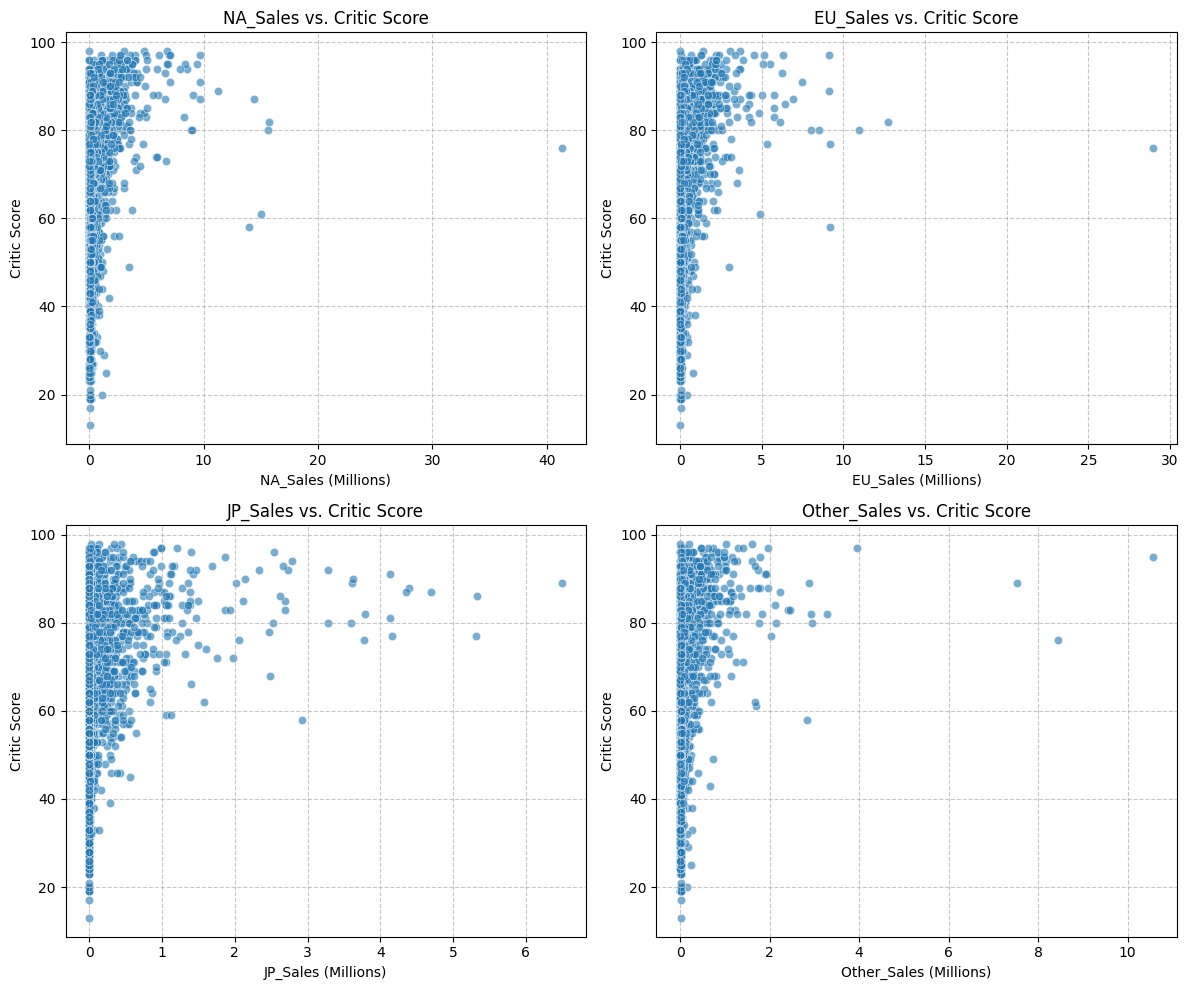

In [87]:
# 3. Regional Sales vs. Critic Score (using subplots)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for ax, region in zip(axes.flatten(), regions):
    sns.scatterplot(x=region, y='Critic_Score', data=data, alpha=0.6, ax=ax)
    ax.set_title(f'{region} vs. Critic Score')
    ax.set_xlabel(f'{region} (Millions)')
    ax.set_ylabel('Critic Score')
    ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Why is it Chosen as a Key Visualization?
The boxplot is an excellent choice because it clearly visualizes the distribution of prices within each TypeName category, including the median price, the interquartile range (IQR), and any outliers. This helps us understand the variability in prices for each laptop type (e.g., Gaming, Ultrabook, Notebook) and compare their typical price ranges effectively.

# Visualization 3: User Score vs. Critic Score

### Why This Visualization Was Chosen?

TODO - Roy: Fill it later

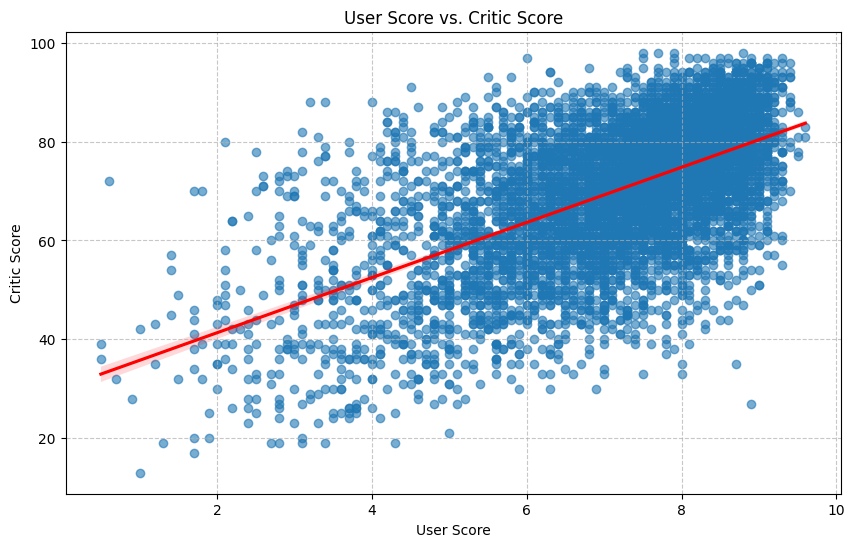

In [90]:
# 2. User Score vs. Critic Score
plt.figure(figsize=(10, 6))
sns.regplot(x='User_Score', y='Critic_Score', data=data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('User Score vs. Critic Score')
plt.xlabel('User Score')
plt.ylabel('Critic Score')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()





### Insights from the Visualization
TODO - Roy: Fill it..

# Visualization 4: Features Correlation Heatmap

### Why This Visualization Was Chosen?
####1. Identify Relationships Between Features:

Helps to identify the strength and direction of relationships between numerical features, including the target variable (User Rating).

####2. Spot Multicollinearity:

Ensures that independent variables are not highly correlated with each other, which can harm model performance.

####3. Feature Selection:

Reveals features most strongly correlated with User Score, guiding which predictors to keep or prioritize.correlated, aiding in feature selection and model building.

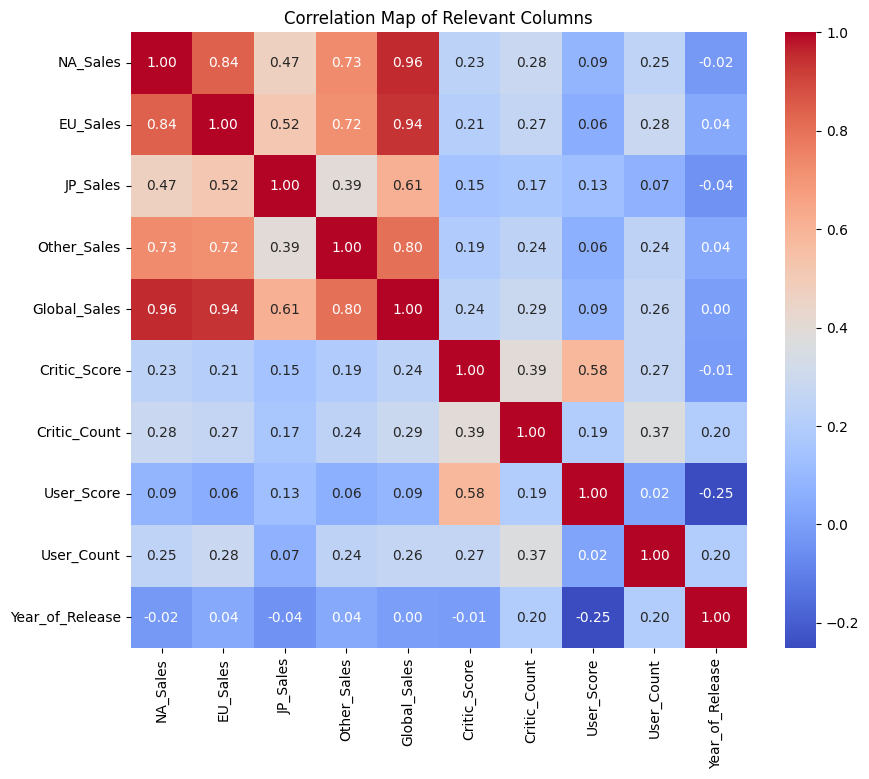

In [93]:
# Select only the relevant numeric columns for correlation
relevant_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
                    'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Year_of_Release']

# Compute the correlation matrix
correlation_matrix = data[relevant_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title("Correlation Map of Relevant Columns")
plt.show()

### Insights from the Visualization
####  1.


The heatmap is the best representation for examining feature relationships because it provides a visual summary of pairwise correlations in a compact and interpretable format. The use of color gradients allows for quick identification of strong positive or negative relationships, while numerical annotations provide precise values. This format is particularly effective for datasets with multiple features, as it enables you to assess all correlations simultaneously, rather than analyzing each pair individually, saving time and reducing complexity.

# Visualization 5: Critic Score by Genre

### Why is this Feature Significant?
The relationship between Price and CPU is significant because the CPU is a primary determinant of performance, efficiency, and computational capability, which directly influences the cost of a laptop. Higher-performance CPUs, typically associated with higher clock speeds, more cores, and newer architectures, often cater to premium devices designed for intensive tasks like gaming, video editing, and professional workloads. This makes the CPU a key feature for distinguishing laptops across price segments.


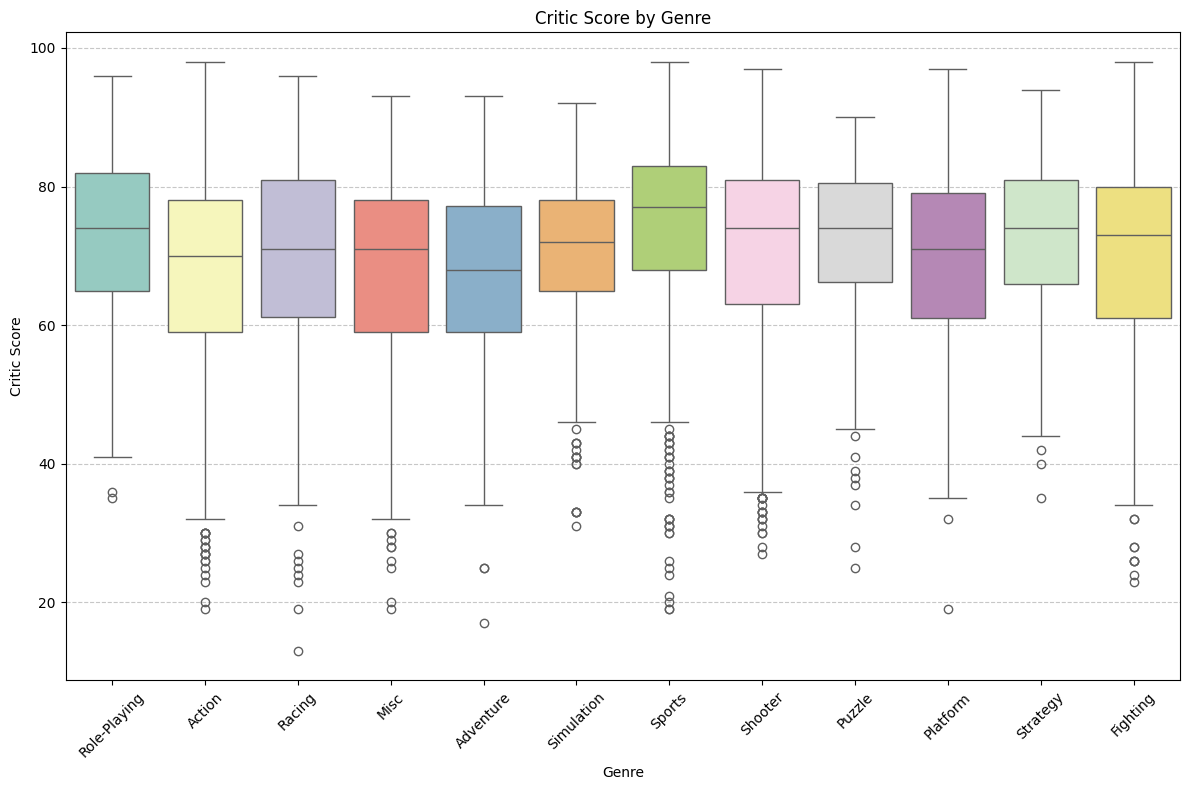

In [91]:
# # Extract the relevant columns for plotting
# x = data['Price']
# y = data['User Rating']

# # Create a scatter plot of Price vs. User Rating
# plt.figure(figsize=(10, 6))
# plt.scatter(x, y, alpha=0.5, color='teal')
# plt.title('Price vs. User Rating for Video Games')
# plt.xlabel('Price (USD)')
# plt.ylabel('User Rating')
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.show()

# 5. Critic Score by Genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Critic_Score', data=data, palette='Set3')
plt.title('Critic Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Critic Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

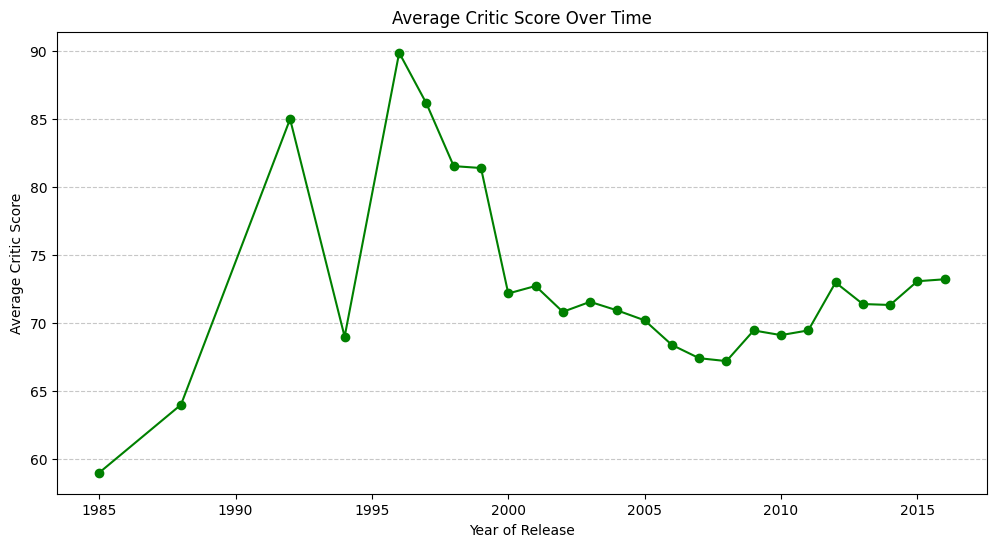

In [92]:
plt.figure(figsize=(12, 6))
average_score_by_year = data.groupby('Year_of_Release')['Critic_Score'].mean()
average_score_by_year.plot(kind='line', marker='o', color='green')
plt.title('Average Critic Score Over Time')
plt.xlabel('Year of Release')
plt.ylabel('Average Critic Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

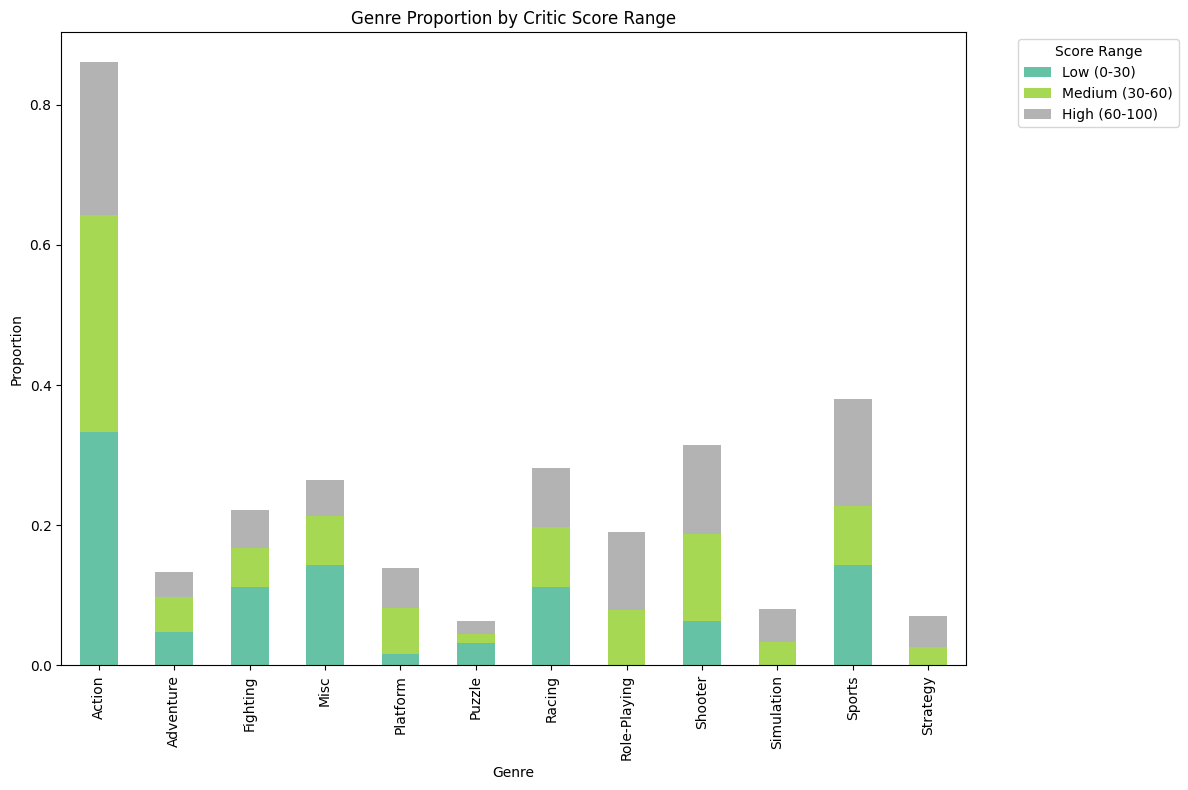

In [98]:
import matplotlib.pyplot as plt
import pandas as pd

# Binning Critic Scores into ranges
score_ranges = pd.cut(data['Critic_Score'], bins=[0, 30, 60, 100], labels=['Low (0-30)', 'Medium (30-60)', 'High (60-100)'])

# Calculate proportions of genres in each Critic Score range
genre_proportions = data.groupby(score_ranges)['Genre'].value_counts(normalize=True).unstack().T

# Plot the stacked bar chart
genre_proportions.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set2')
plt.title('Genre Proportion by Critic Score Range')
plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.legend(title='Score Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

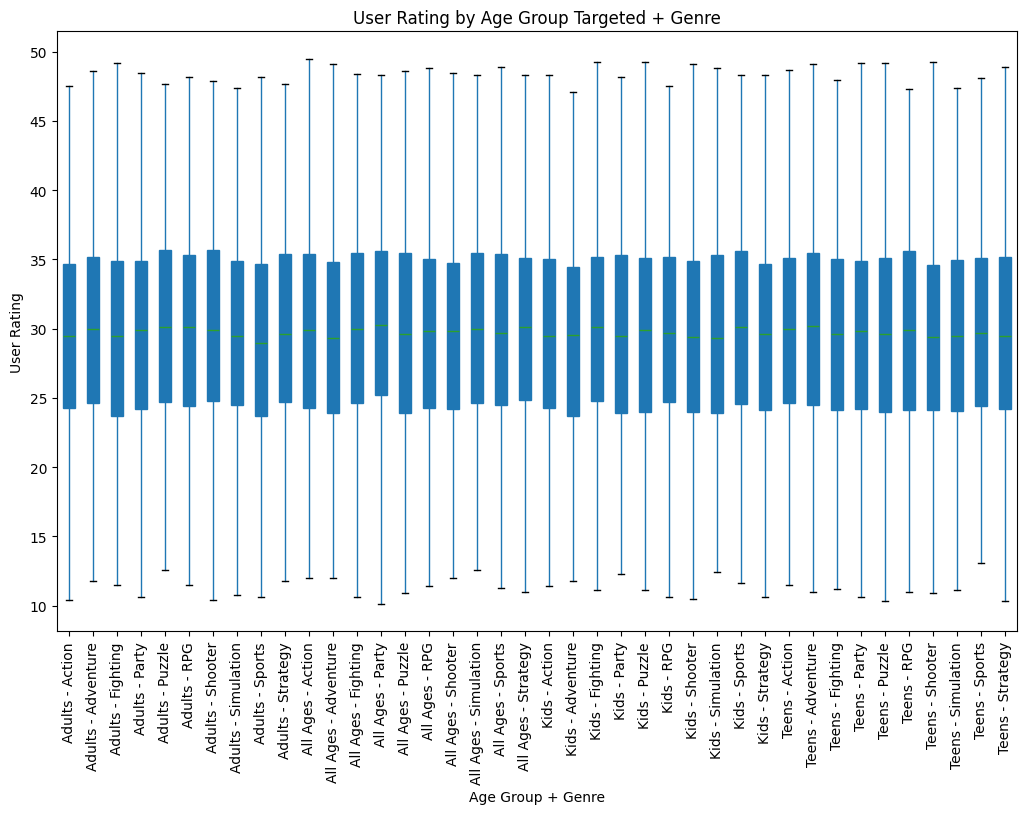

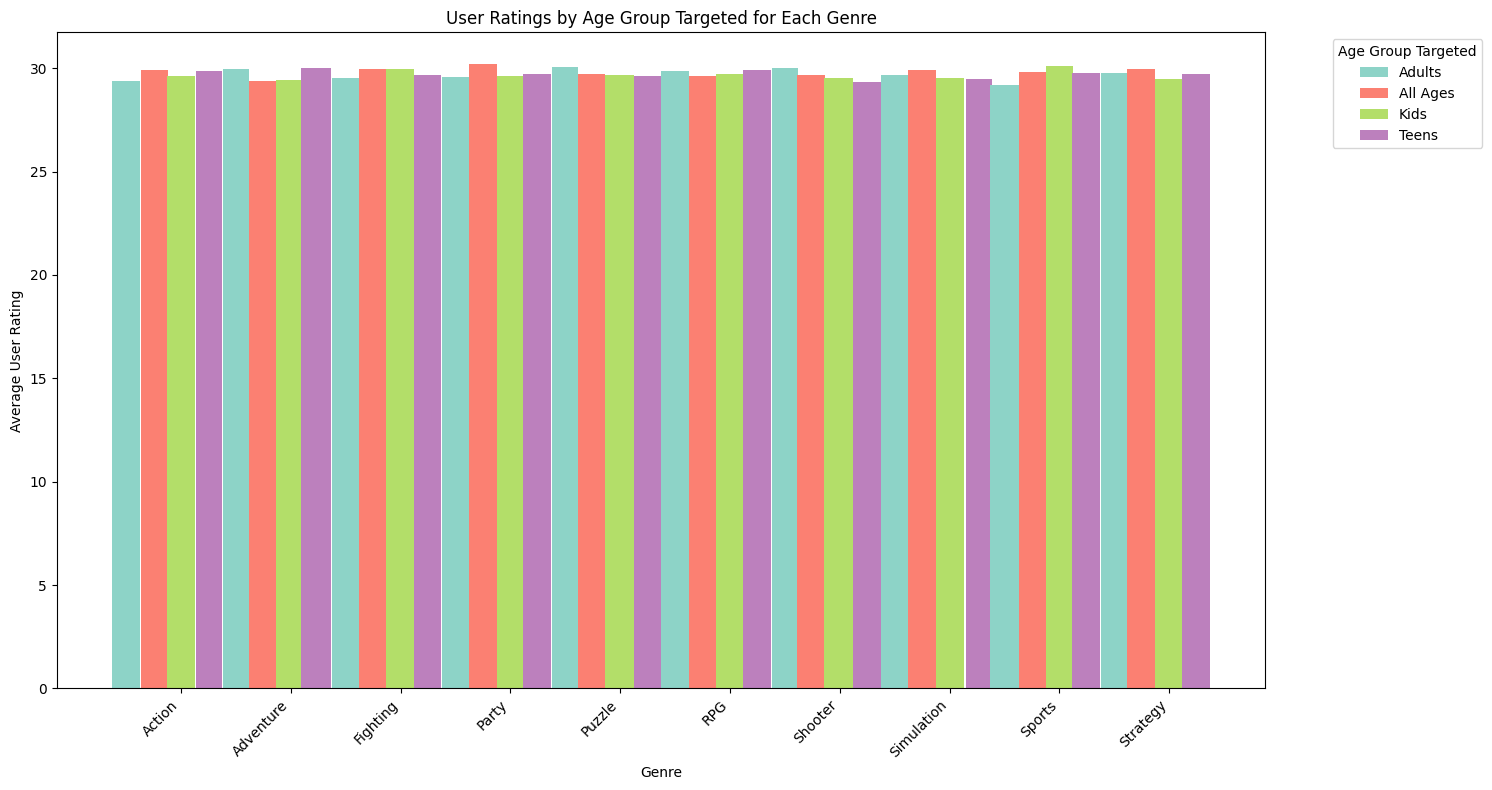

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./Dataset/video_game_reviews.csv')

# Combine 'Age Group Targeted' and 'Genre' into a single column for grouping
df['Age+Genre'] = df['Age Group Targeted'] + ' - ' + df['Genre']

# Sort by average user rating for better visualization
sorted_categories = df.groupby('Age+Genre')['User Rating'].mean().sort_values().index

# Create a box plot of User Rating for each Age+Genre category
plt.figure(figsize=(12, 8))
df.loc[df['Age+Genre'].isin(sorted_categories)].boxplot(
    column='User Rating',
    by='Age+Genre',
    grid=False,
    figsize=(12, 8),
    vert=True,
    patch_artist=True,
    rot=90
)

plt.title('User Rating by Age Group Targeted + Genre')
plt.suptitle('')  # Remove the default Pandas title
plt.xlabel('Age Group + Genre')
plt.ylabel('User Rating')
plt.show()

import numpy as np

# Load the CSV file into a DataFrame


# Group by 'Genre' and 'Age Group Targeted' to calculate the count and average user rating
grouped = df.groupby(['Genre', 'Age Group Targeted'])['User Rating'].agg(['count', 'mean']).reset_index()
total_counts_per_genre = grouped.groupby('Genre')['count'].transform('sum')
grouped['width'] = grouped['count'] / total_counts_per_genre  # Normalize the widths to be relative to the genre

# Unique genres and age groups
genres = grouped['Genre'].unique()
age_targets = grouped['Age Group Targeted'].unique()

# Create the plot
fig, ax = plt.subplots(figsize=(15, 8))

# Plot each genre with multiple bars for each age group
for i, genre in enumerate(genres):
    genre_data = grouped[grouped['Genre'] == genre]
    x_position = i  # X-axis position for the genre
    total_offset = 0  # Total offset to position each bar within the genre
    for _, row in genre_data.iterrows():
        # Plot a rectangle for the age group in this genre
        width = row['width']  # Width proportional to count of games
        height = row['mean']  # Height is the average rating
        color = plt.cm.Set3(age_targets.tolist().index(row['Age Group Targeted']) / len(age_targets))
        ax.bar(x=x_position + total_offset, height=height, width=width, color=color, label=row['Age Group Targeted'])
        total_offset += width  # Move to the next position for the next age group

# Customization
ax.set_xticks(np.arange(len(genres)) + 0.5)  # Center the labels under each genre
ax.set_xticklabels(genres, rotation=45, ha='right')
ax.set_xlabel('Genre')
ax.set_ylabel('Average User Rating')
ax.set_title('User Ratings by Age Group Targeted for Each Genre')

# Create a legend for age groups
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicates in the legend
ax.legend(by_label.values(), by_label.keys(), title='Age Group Targeted', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



### Why is it Chosen as a Key Visualization?
The scatterplot is chosen because it visually captures the direct relationship between CPU Speed and Price for individual laptops in a detailed and intuitive manner. By plotting each laptop as a point, it allows for easy identification of trends, outliers, and variability across different ranges. Unlike aggregated visualizations, it preserves the granularity of the data, showing the exact distribution of individual points rather than summarized averages.

# preproccing

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Apply one-hot encoding for non-ordinal categorical variables
categorical_columns = ['Name', 'Genre','Publisher', 'Developer', 'Rating']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Fill missing values (example: median for numeric, mode for categorical)
data = data.fillna(data.median(numeric_only=True))

# Split features and target
X = data.drop(columns=['Critic_Score'])
y = data['Critic_Score']

# Feature scaling for numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# # Normalize target (User_Score)
# scaler_y = MinMaxScaler()
# y = scaler_y.fit_transform(data['User_Score'].values.reshape(-1, 1)).ravel()

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Final processed data - TODO: Consider if we really need this..
model_data = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
}

# Basic Model Pipeline

In [69]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Train XGBoost model
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("Model training complete.")

Model training complete.


# Results of the basic pipeline

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance Metrics:")
print(f"RMSE: {rmse:.2f}k")
print(f"MAE: {mae:.2f}k")
print(f"R2 Score: {r2:.3f}")

Model Performance Metrics:
RMSE: 8.40k
MAE: 6.37k
R2 Score: 0.644


# Error Analysis
After running the basic model, we will analyze its errors to identify areas for improvement.

### A. Predicted vs Actual Price
The "Predicted vs Actual Price" plot is important for error analysis as it visually shows how closely the model’s predictions align with actual values. It helps identify systematic errors and assess model accuracy by how close the points are to the red dashed line. This enables the identification of areas where the model performs poorly and highlights specific weaknesses for improvement.

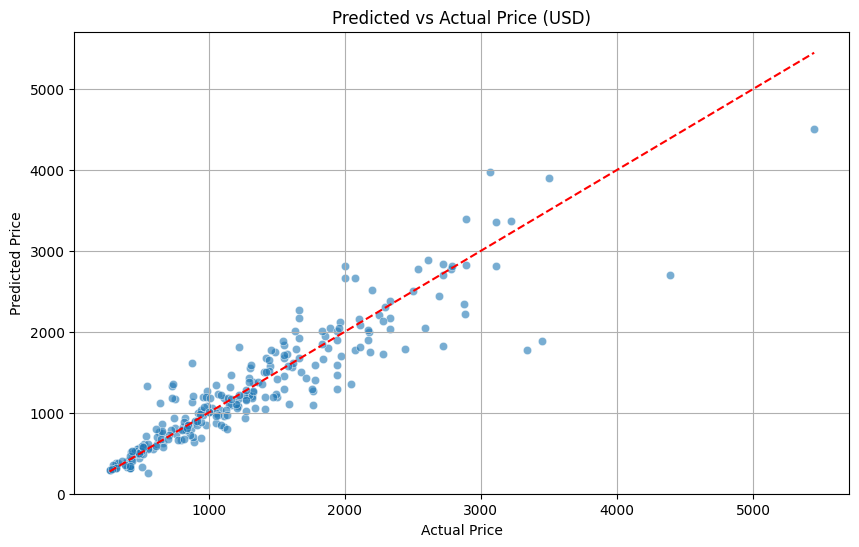

In [ ]:
# Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Predicted vs Actual Price (USD)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

#### Insights
- **Strong Correlation**:
    The points closely follow the red diagonal line, indicating that the model's predictions are strongly correlated with the actual prices. This suggests the model is performing well.
- **Outliers**:
    A few points significantly deviate from the red line. These represent outliers where the model struggles to predict accurately, potentially due to unusual or extreme values in the data.
- **Key Actionable Insights**:
    - The model is reliable for the majority of the dataset but struggles with extreme cases (outliers). Investigating these outliers could provide insights into model improvement, such as refining feature engineering or handling rare cases differently.
    - The consistent clustering around the diagonal shows that the feature selection and preprocessing were effective in creating an accurate model.


### B. Error Distribution
The "Error Distribution" plot is crucial in error analysis as it highlights the spread, bias, and symmetry of residuals, helping identify systematic errors and outliers, and evaluate if the residuals follow a normal distribution—essential for assessing the model's assumptions and areas needing improvement.

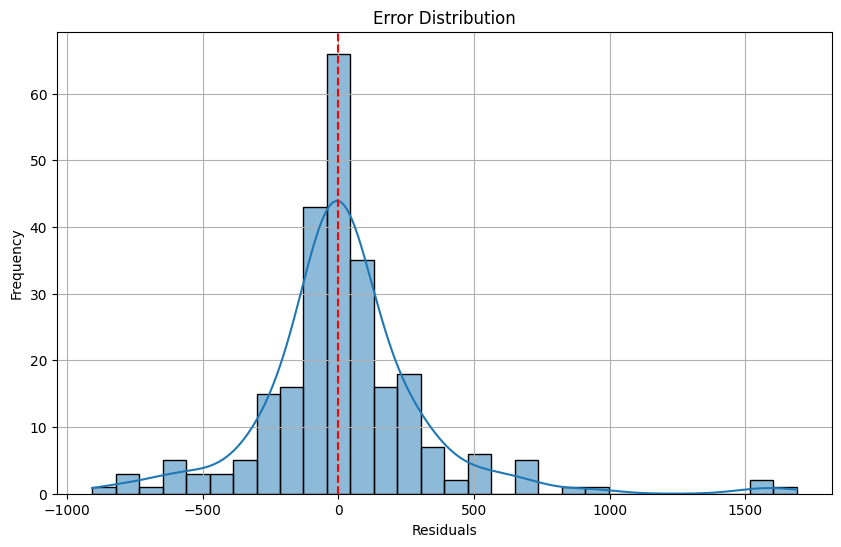

In [ ]:
# Calculate residuals
residuals = y_test - y_pred


# Plot Error Distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Residual (Perfect Prediction)')
plt.title("Error Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


#### Insights
- **Concentration of Residuals**:
    The majority of residuals are tightly clustered around zero, reinforcing the model's general accuracy across most predictions. This suggests a strong alignment between actual and predicted prices for the bulk of the data.

- **Distribution Patterns**:
    The presence of a relatively smooth curve suggests that the errors follow an approximately normal distribution. This supports the assumption that the model handles errors systematically rather than erratically, which is favorable for further tuning and improvement.

- **Actionable Insight**:
    The slight skewness and presence of outliers on the positive side suggest a need to explore higher-priced laptops in more detail. For instance, feature engineering (like better handling of brand-specific effects or rare configurations) may reduce these overestimations.


### C. Features Importance
This plot is essential for error analysis as it identifies which features significantly impact the model's predictions. This enables targeted investigation into whether high-importance features are contributing to errors or if low-importance features are adding noise, thereby guiding improvements in feature selection and model development.

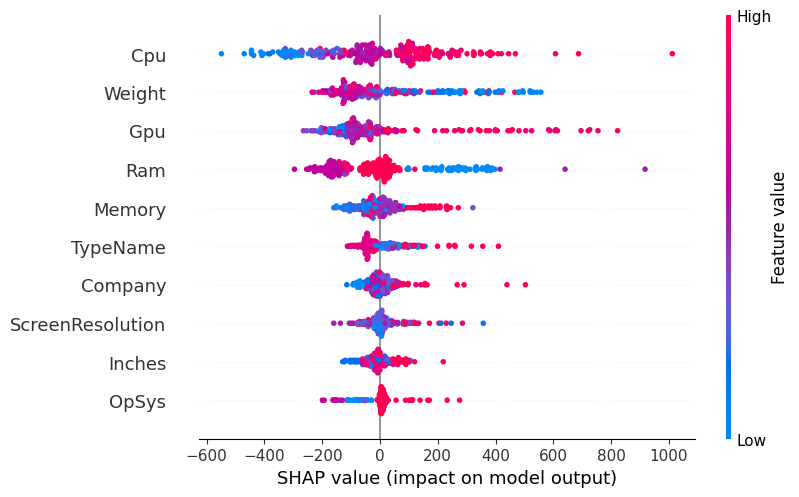

In [ ]:
import shap

# Calculate SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot SHAP beeswarm plot
shap.plots.beeswarm(shap_values)

#### Insights
- **Feature Importance and Contribution**:
   - **Cpu, Weight, and Gpu** have significant SHAP values, indicating they are critical for predicting price.
   - Features like **OpSys** and **Inches** have relatively small SHAP values, meaning they have a limited impact on price prediction.

- **Most Influential Feature**:
    Among all features, **Cpu** stands out as the most consistently impactful on price prediction. Higher CPU performance (e.g., speed, generation) strongly correlates with higher prices, reflecting the importance of computational power in determining the value of laptops.

- **Outliers and Variability**:
   - Some features, such as **Gpu** and **Weight**, have wide spreads of SHAP values, indicating variability in their influence across the dataset.
   - The presence of outliers (dots far from the cluster) suggests specific cases where a feature has an unusually high or low impact.

- **Actionable Insight**:
   - Features with high SHAP value variability, like **Gpu** and **Weight**, might require further feature engineering or detailed analysis to capture their nuanced effects better.
   - **OpSys** and **Inches** may have less relevance for price prediction and could potentially be deprioritized or re-examined.

### D. Overestimations and Underestimations by Price


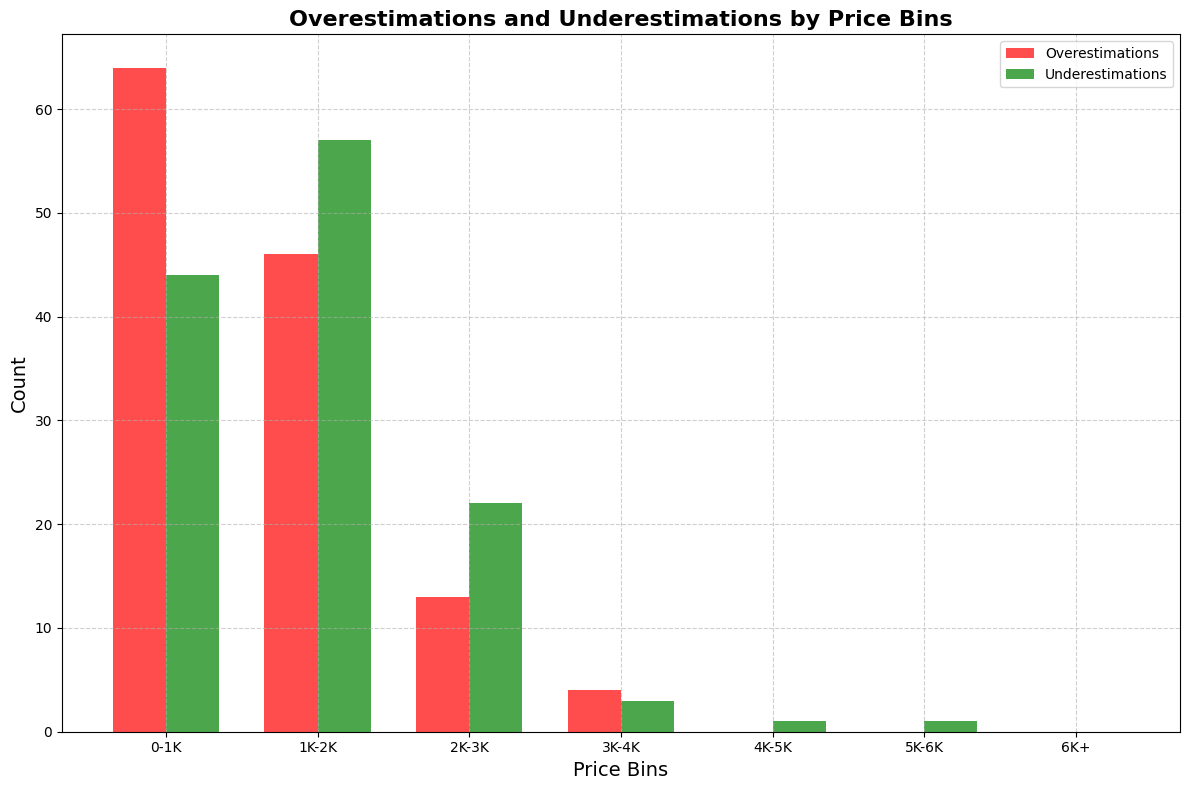

In [ ]:

# Define bins for price ranges
price_bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
price_labels = ['0-1K', '1K-2K', '2K-3K', '3K-4K', '4K-5K', '5K-6K', '6K+']
y_test_binned = pd.cut(y_test, bins=price_bins, labels=price_labels)

# Create a DataFrame for analysis
analysis_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Residual': residuals,
    'Price Range': y_test_binned
})

# Calculate overestimations and underestimations by price range
over_under_estimations = analysis_df.groupby('Price Range').apply(
    lambda group: pd.Series({
        'Overestimations': (group['Residual'] < 0).sum(),
        'Underestimations': (group['Residual'] > 0).sum()
    })
).reset_index()

# Plot overestimations and underestimations by price range
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(over_under_estimations))

plt.bar(index, over_under_estimations['Overestimations'], bar_width, label='Overestimations', color='red', alpha=0.7)
plt.bar(index + bar_width, over_under_estimations['Underestimations'], bar_width, label='Underestimations', color='green', alpha=0.7)

plt.ylabel('Count', fontsize=14)
plt.xlabel('Price Bins', fontsize=14)
plt.title('Overestimations and Underestimations by Price Bins', fontsize=16, fontweight='bold')
plt.xticks(index + bar_width / 2, over_under_estimations['Price Range'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Insights
- **Higher Errors in Lower Price Ranges**:
    The **0-1K** and **1K-2K** price bins exhibit a higher number of both overestimations (red bars) and underestimations (green bars). This indicates that the model struggles to predict accurately in the lower price range, possibly due to higher variability or the influence of features not fully captured by the model.

- **Imbalance Between Overestimations and Underestimations**:
   - In the **0-1K** range, overestimations (red) are more frequent than underestimations (green), indicating a bias where the model predicts higher prices than the actual ones for lower-cost laptops.
   - Conversely, in the **2K-3K** range, underestimations are more frequent, implying that the model undervalues some laptops in this range.

- **Actionable Insights**:
   - Focus on improving model performance for the **0-2K** range by examining feature contributions and ensuring that key predictors (e.g., RAM, CPU) are appropriately weighted for these lower-priced laptops.
   - Investigate cases of frequent underestimations in the **2K-3K** range to refine the model for this category.
   - Collect more data or adjust the model for high-priced laptops (**4K+**) to increase reliability in this segment.